Уровень 0
Придумайте матрицы, которые обладают следующими свойствами:
a) диагональная, ортогональная, но не единичная(!):
b) верхнетреугольная, ортогональная:
c) нижнетреугольная, ортогональная:
d) матрица, у которой определитель = 1, и все элементы не равны 0:
P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import pylab as pl
import warnings

from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [14]:
#диагональная, ортогональная, но не единичная
A = np.diag([0.5,2,1])
print(A)

[[0.5 0.  0. ]
 [0.  2.  0. ]
 [0.  0.  1. ]]


In [23]:
#верхнетреугольная, ортогональная

B = np.triu([[1,2,3],[4,0.5,6],[7,8,2]], 0)
print(B)


[[1.  2.  3. ]
 [0.  0.5 6. ]
 [0.  0.  2. ]]


In [24]:
#нижнетреугольная, ортогональная
C = np.tril([[1,2,3],[4,0.5,6],[7,8,2]], 0)
print(C)


[[1.  0.  0. ]
 [4.  0.5 0. ]
 [7.  8.  2. ]]


In [13]:
#матрица, у которой определитель = 1, и все элементы не равны 0
D = np.array([[2, 3], [3, 5]], dtype=np.float32)
det = np.linalg.det(D)
print(D)
print('Определитель матрицы =', det)

[[2. 3.]
 [3. 5.]]
Определитель матрицы = 1.0


Уровень 1:
Найдите спектральное разложение матрицы:

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE. *

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA

In [7]:
m = np.array([[1,2], [2,3]])
m

array([[1, 2],
       [2, 3]])

In [25]:
a, U = linalg.eig(m)
print('Собственные значения:')
print(np.array(a, dtype=float))
print('\nСобственные вектора:')
print(U)

Собственные значения:
[-0.23606798  4.23606798]

Собственные вектора:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [9]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1. 2.]
 [2. 3.]]


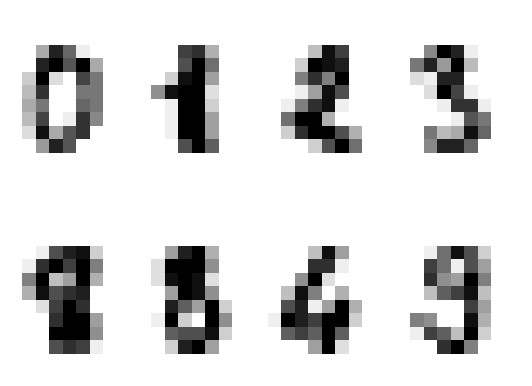

In [26]:
from PIL import Image
img = Image.open("numbers.jpg")
arr = np.array(img.getdata())
img

In [40]:
arr

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]])

In [37]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [44]:
ipca = IncrementalPCA(n_components=2, batch_size=3)
ipca.fit(arr)

In [47]:
IncrementalPCA(batch_size=3, n_components=2)
x = ipca.transform(arr)

In [48]:
arr_new = ipca.inverse_transform(x)

In [49]:
arr_new

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       ...,
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.]])

In [28]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(arr_new, arr, squared=False)

1.2511420057726e-12

In [54]:
ipca = IncrementalPCA(n_components=3)
ipca.fit(arr)

IncrementalPCA(n_components=3)
x = ipca.transform(arr)

arr_new = ipca.inverse_transform(x)

In [55]:
mean_squared_error(arr_new, arr, squared=False)

2.99217626420834e-14